In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


Extract voltage feature

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Camden 4.png
Camden 5.png
Hendrina 6.png
Kendal 3.png
Kendal 6.png
Picture1.png
Picture12.png
Picture14.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Picture15.png
Picture16.png
Picture1CV.png
Picture1S.png
Picture1V.png


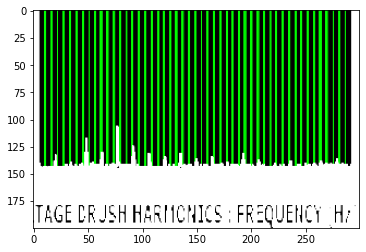

In [68]:
# get the path or directory
folder_dir = "ShaftEarthing/FaultyVoltage/"
i = 0
for images in os.listdir(folder_dir):
    i = i + 1
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        # display
        print(images)
        img = im.imread('ShaftEarthing/FaultyVoltage/{}'.format(images))
        #print(img.shape[0])
        imge = img[int((img.shape[0]*0.35)):int((img.shape[0]*0.587)),int(((img.shape[1])*0.52)):int(((img.shape[1])*0.99)),:]
# Output img with window name as 'image'
        imge = cv2.resize(imge, (300, 200))
        if (images.endswith(".jpg") or images.endswith(".JPG")):
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
        else:
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
            imge = imge*255
        plt.imshow(imge)
        imgs.append({'faulty':imge})
        cv2.imwrite('ShaftEarthing/train/voltage/faulty/{}.png'.format(i), imge)
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Arnot 3.png
Kusile U1 25-10-2019.png
Lethabo 4.png
Lethabo 6.png
Lethabo 61.png
Lethabo 62.png
Lethabo U4.png
Majuba 6.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Matla 5.png
Medupi 1.png
Screenshot 2022-08-29 174540.png
Tutuka 6.png


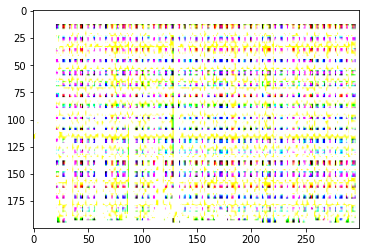

In [69]:
# get the path or directory
folder_dir = "ShaftEarthing/NormalVoltage/"
i = 0
for images in os.listdir(folder_dir):
    i = i + 1
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        # display
        print(images)
        img = im.imread('ShaftEarthing/NormalVoltage/{}'.format(images))
        #print(img.shape[0])
        imge = img[int((img.shape[0]*0.35)):int((img.shape[0]*0.587)),int(((img.shape[1])*0.52)):int(((img.shape[1])*0.99)),:]
# Output img with window name as 'image'
        imge = cv2.resize(imge, (300, 200))
        if (images.endswith(".jpg") or images.endswith(".JPG")):
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
        else:
            imge = cv2.cvtColor(imge, cv2.COLOR_BGR2RGB)
            imge = imge*255
        plt.imshow(imge)
        imgs.append({'faulty':imge})
        cv2.imwrite('ShaftEarthing/train/voltage/normal/{}.png'.format(i), imge)
        


Extract training data for the model

In [70]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [71]:
train_data = train.flow_from_directory('ShaftEarthing/train/voltage',target_size=(300,200),class_mode= 'binary')
validation_data = validation.flow_from_directory('ShaftEarthing/validation/voltage',target_size=(300,200),class_mode= 'binary')

Found 25 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [72]:
train_data.class_indices

{'faulty': 0, 'normal': 1}

Create model and fit model

In [73]:
model = Sequential([Conv2D(16,(3,3),activation='relu',input_shape=(300,200,3)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation= 'relu'),
                    MaxPooling2D(2,2),
                    Conv2D(32,(3,3),activation= 'relu'),
                   MaxPooling2D(2,2),
                   Flatten(),
                   Dense(64,activation='relu'),
                   Dense(32,activation='relu'),
                    Dense(1,activation='sigmoid')])

In [74]:
model.compile(loss='binary_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [75]:
fitted_model = model.fit(train_data,steps_per_epoch=1,epochs=15, validation_data = validation_data)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.7043 - accuracy: 0.2400 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 934ms/step - loss: 0.6421 - accuracy: 0.6000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 1s 878ms/step - loss: 0.6164 - accuracy: 0.5600 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 852ms/step - loss: 0.5396 - accuracy: 0.7200 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 1s 829ms/step - loss: 0.5246 - accuracy: 0.6800 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 1s 887ms/step - loss: 0.4541 - accuracy: 0.8400 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 1s 900ms/step - loss: 0.4193 - accuracy: 0.7600 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 8/15
1/1 [=======

Save model into json file for future use

In [76]:
# serialize model to JSON
model_json = model.to_json()
with open("voltage_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("voltage_model.h5")
print("Saved model to disk")

Saved model to disk


Load the model

In [77]:
# load json and create model
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('voltage_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("voltage_model.h5")
print("Loaded model from disk")

Loaded model from disk
